In [22]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [23]:
import numpy as np                                              
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()

from subprocess import check_output

In [24]:
facebook_data = pd.read_csv("C:/Users/Admin/Desktop/Data Scince Insaid/facebook_data.csv")     # Importing training dataset using pd.read_csv

In [25]:
facebook_data.shape

(99003, 15)

In [26]:
facebook_data.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [27]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [28]:
facebook_data.tail()  

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [29]:
facebook_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [30]:
facebook_data.columns = map(str.lower, facebook_data.columns)                                  # map() function returns a list of results after applying the given function                                                                         # to each item of a given iterable.
facebook_data.dtypes 

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [31]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [32]:
facebook_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [33]:
profile = pandas_profiling.ProfileReport(facebook_data)
profile.to_file(output_file="facebook_before_preprocessing.html")

In [34]:
facebook_data.tenure = facebook_data.tenure.fillna(facebook_data['tenure'].mode()[0])

In [35]:
print("'age'")                                                                
print("Minimum value: ", facebook_data["age"].min())
print("Maximum value: ", facebook_data["age"].max())
print("How many values are NaN?: ", pd.isnull(facebook_data['age']).sum())

'age'
Minimum value:  13
Maximum value:  113
How many values are NaN?:  0


In [36]:
facebook_data.gender.value_counts(dropna=False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [37]:
facebook_data.gender.unique()

array(['male', 'female', nan], dtype=object)

In [38]:
print("Count of distinct responses for Gender:", len(set(facebook_data['gender']))) 
print("Distinct responses for Gender:", set(facebook_data['gender']))   

Count of distinct responses for Gender: 3
Distinct responses for Gender: {'female', nan, 'male'}


In [39]:
facebook_data['gender'].fillna(facebook_data['gender'].mode()[0],inplace=True)

In [40]:
facebook_data.gender.unique()

array(['male', 'female'], dtype=object)

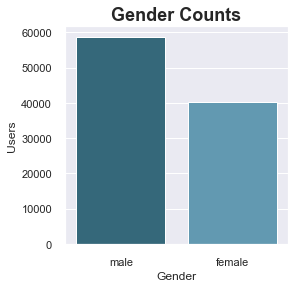

In [41]:
plt.figure(figsize=(4,4))
sns.countplot('gender',data = facebook_data, order = facebook_data['gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Users')
plt.show()

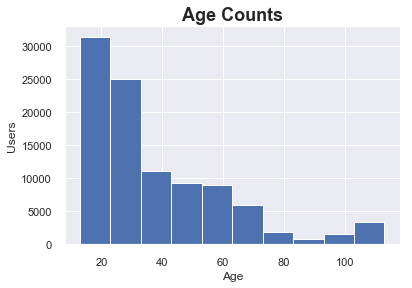

In [42]:
facebook_data.age.plot.hist()
plt.title("Age Counts",fontsize=18,fontweight="bold")
plt.xlabel('Age')
plt.ylabel('Users')
plt.show()

Text(0.5, 1.0, 'Age Verses Gender')

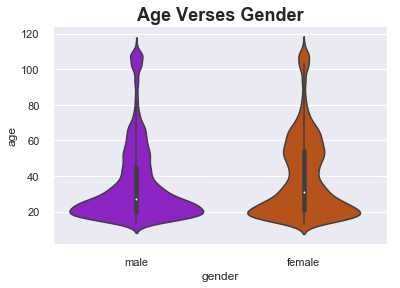

In [43]:
ax = sns.violinplot(x="gender", y="age", palette="gnuplot", data=facebook_data)
plt.xlabel("gender")
plt.ylabel("age")
plt.title("Age Verses Gender", fontsize=18, fontweight = "bold")

(0, 1000)

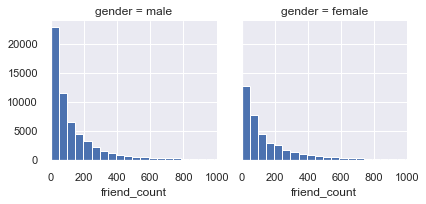

In [44]:
df=facebook_data[facebook_data.gender.notnull()]
g=sns.FacetGrid(df,col="gender")
g=g.map(plt.hist,"friend_count",bins=100)
plt.xlim(0,1000)

In [45]:
max(facebook_data.age)

113

In [46]:
#divided the age into a group of 10. see last column
age_groups=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook_data['age_group'] = pd.cut(facebook_data.age,bins=np.arange(10,121,10),labels=age_groups,right=True)
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [47]:
#Counting value in age groups
facebook_data.age_group.value_counts()

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
Name: age_group, dtype: int64

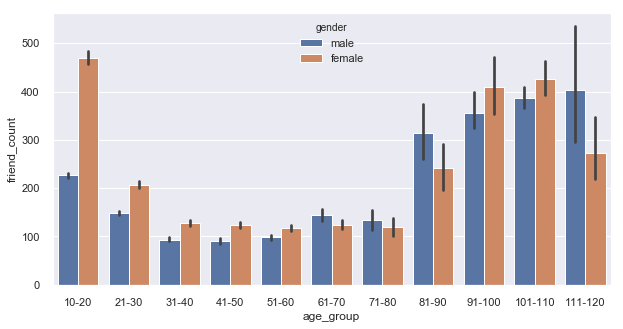

In [48]:
#Females have more friends than males
plt.figure(figsize=(10,5))
sns.barplot(x=facebook_data['age_group'],y=facebook_data['friend_count'],hue=facebook_data.gender)

In [49]:
#No of people having some friends
a=np.count_nonzero(facebook_data.friend_count)
a

97041

In [50]:
#All the people having zero friends
fcount=facebook_data.friend_count==0
fcount.value_counts()

False    97041
True      1962
Name: friend_count, dtype: int64

In [51]:
facebook_data.tenure.interpolate(inplace=True)

In [52]:
newtenure=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
facebook_data['year_group']=pd.cut(facebook_data.tenure,bins=np.arange(-1,3300,365),labels=newtenure,right=True)

In [53]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year


In [54]:
facebook_data.year_group.value_counts()

0-1 year     43534
1-2 years    33449
2-3 years     9887
3-4 years     5443
4-5 years     4568
5-6 years     1513
6-7 years      585
7-8 years       15
8-9 years        9
Name: year_group, dtype: int64

In [55]:
#pivot table
facebook_data.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='age_group'
                          ,columns='gender')

mobile_likes             mobile_likes_received             \
gender          female        male                female       male   
age_group                                                             
10-20       248.751005   70.213104            288.892095  55.163865   
21-30       165.645013   58.041295            142.788701  35.924310   
31-40       174.898677   46.419198            106.549275  27.672434   
41-50       176.355380   55.958110             97.832104  32.929124   
51-60       133.077017   56.566849             72.727291  29.932924   
61-70       111.957092   55.673342             60.727248  35.504380   
71-80        78.029292   29.283333             32.637103  31.496078   
81-90       109.277922   59.148148             74.779221  53.337963   
91-100      119.665996  111.641274             84.623742  75.623269   
101-110     103.120637   85.668231            102.235964  74.315814   
111-120      97.717949   48.694215             70.205128  39.363636   

            www_likes            www_likes_received             
gender         female       male             female       male  
age_group                                                       
10-20      130.071009  32.516180         197.664228  37.177952  
21-30       54.734040  15.015658          89.672343  21.576539  
31-40       50.029437  10.934897          68.240614  16.462514  
41-50       76.554821  17.002184          80.625032  21.411952  
51-60      105.640317  31.676671          72.171510  24.439518  
61-70      106.303088  46.893930          64.030883  30.311327  
71-80       84.175753  45.833333          34.965826  47.999020  
81-90       49.355844  48.634259          39.555844  38.118056  
91-100      61.603622  54.738227          53.507042  48.775623  
101-110     78.595599  44.502112          64.423369  41.175035  
111-120     67.606838  35.264463          56.555556  29.446281

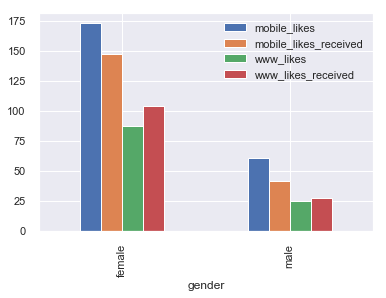

In [56]:
facebook_data.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='gender').plot.bar()

In [57]:
#Getting those people who are most interested in sending friend requests
friend_request=facebook_data.sort_values(by='friendships_initiated',ascending=False)[:10]
friend_request

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years
98842,1052695,22,23,1991,9,female,874.0,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years
98675,1949247,19,9,1994,11,female,434.0,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years
98567,1205425,60,17,1953,6,female,1562.0,4794,3538,586,1318,560,960,26,358,51-60,4-5 years
98347,1403953,19,11,1994,11,male,519.0,3693,3415,170,20,170,19,0,1,10-20,1-2 years
98960,1745067,17,1,1996,1,female,947.0,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years
98898,2010847,18,10,1995,2,female,1084.0,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years
98949,1103175,15,24,1998,8,female,487.0,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years
98685,1934087,19,19,1994,5,male,575.0,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years
98835,1075221,22,23,1991,5,male,907.0,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years


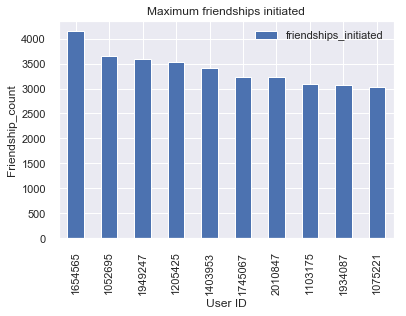

In [58]:
friend_request.plot(x='userid',y='friendships_initiated',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title("Maximum friendships initiated")
plt.show()

In [59]:
friend_request['fr_per_day']=friend_request.friendships_initiated / friend_request.tenure
friend_request

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,fr_per_day
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years,10.517766
98842,1052695,22,23,1991,9,female,874.0,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years,4.180778
98675,1949247,19,9,1994,11,female,434.0,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years,8.281106
98567,1205425,60,17,1953,6,female,1562.0,4794,3538,586,1318,560,960,26,358,51-60,4-5 years,2.265045
98347,1403953,19,11,1994,11,male,519.0,3693,3415,170,20,170,19,0,1,10-20,1-2 years,6.579961
98960,1745067,17,1,1996,1,female,947.0,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years,3.419219
98898,2010847,18,10,1995,2,female,1084.0,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years,2.982472
98949,1103175,15,24,1998,8,female,487.0,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years,6.336756
98685,1934087,19,19,1994,5,male,575.0,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years,5.353043
98835,1075221,22,23,1991,5,male,907.0,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years,3.334068


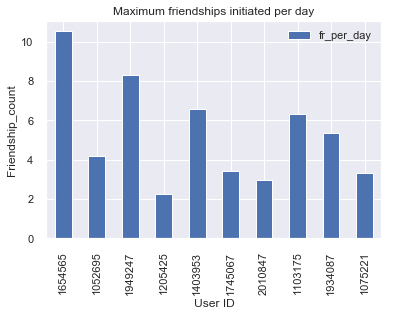

In [60]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
friend_request.plot(x='userid',y='fr_per_day',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title('Maximum friendships initiated per day')
plt.show()